<a href="https://colab.research.google.com/github/sakethbachu/Covid19-Outbreak-and-NPI-Prediction/blob/master/covid19_outbreak_and_npi_prediction_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Building a model that can assist in scaling up the implementation of NPIs based on kalman filter and machine learning algorithms.

As we know the **Covid19** is frightening all of us and has affected more than 185 countries, there is an urgent need in ways to control its further spread and help people saving lives. There is a lot of research work that is being done currently in the field of effectiveness of different mitigation measures for **Covid19**. In this notebook we describe an effective way that can be used to deploy npis in regions based on various parameters. We hope this work would help us fighting the covid19 pandemic in an effective way.

This map shows the present status of the coronavirus infections across the world.

In [2]:
from ipywidgets import Image
f = open("/content/gdrive/My Drive/covid19h/c1.jpg", "rb")
image = f.read()
Image(value=image)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x0…

# Goal/Tasks

1) Our major goal is to provide guidance on ways to scale up NPIs in a more coordinated way (e.g., establish funding, infrastructure and authorities to support real time, authoritative (qualified participants) collaboration with all states to gain consensus on consistent guidance and to mobilize resources to geographic areas where critical shortfalls are identified) to give us time to enhance our health care delivery system capacity to respond to an increase in cases.

2) Rapid assessment of the likely efficacy of school closures, travel bans, bans on mass gatherings of various sizes, and other social distancing approaches.

3) Models of potential interventions to predict costs and benefits that take account of such factors as race, income, disability, age, geographic location, immigration status, housing status, employment status, and health insurance status.

4) The last point would be building a guideline model that will help control, any such pandemic and not let things go too far.

# What all did we do?

1) First step: Prediction of the outbreak, forecasting in terms of number of cases, number of deaths etc.

2) Second step: Prediction of the best-suited npi for the particular situation based on the previous history of implementations.


* **Methods used for the first step:** We used regression techniques accompanied by a tool called Kalman filter which is found effective to give accurate predictions for such outbreaks.

* Kalman filter: In statistics and control theory, Kalman filtering, also known as linear quadratic estimation (LQE), is an algorithm that uses a series of measurements observed over time, containing statistical noise and other inaccuracies, and produces estimates of unknown variables that tend to be more accurate than those based on a single measurement alone, by estimating a joint probability distribution over the variables for each timeframe. The filter is named after Rudolf E. Kálmán, one of the primary developers of its theory.

* Source: https://en.wikipedia.org/wiki/Kalman_filter

* **Methods used for the second step** We have techniques like SMOTE(synthetic minority oversampling technique) to tackle our data-imbalance problem, various machine learning techniques like Random-Forest, KNearNeighboursClassifier, Decision trees etc. We have shown the performance of some of the best machine-learning techniques on our dataset in step two.

# Internet must be turned on for this notebook to work.

**Importing the necessary packages and libraries that are necessary for step-one.**

In [0]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import cv2


* All the time-series data that is required for our analysis and prediction is taken from: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

* Although similar data is being maintained by this github repository: https://github.com/CSSEGISandData/COVID-19

* We will be going ahead with the data that is maintained by the above-mentioned **repository**.

* **Disclaimer**: Turn your internet on for this.

* Using the urls, we import the required data and store it different dataframes.

* We are using the **Pandas** library for doing this task.

* You can read the **official-documentation** for any additional information: https://pandas.pydata.org/

In [0]:

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url, error_bad_lines=False)

# Replacing some of the column names.

In [0]:
# replacing the region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "Unites States")
death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "Unites States")
recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "Unites States")

* In the next step, we are going to merge the population-values of different countries with all the above created dataframes.

* The population-values are being taken from this dataset on kaggle: https://www.kaggle.com/fernandol/countries-of-the-world

In [0]:
population=pd.read_csv('/content/gdrive/My Drive/covid19h/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

* We make sure this is working by looking at the first 5 rows of the dataframe, by calling the pandas.dataframe.head() function.

* You can find more information regarding this function here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

In [7]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,Population
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,"35,530,000"
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,NaN
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,"41,320,000"
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,NaN
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,NaN


In [8]:
#now we merge the regions
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed=confirmed[confirmed.iloc[:,confirmed.shape[1]-3]>1000]# regions having more than 1000 active cases till date.
confirmed.iloc[:5,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,Population,region
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,"35,530,000",Afghanistan_nan
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,"41,320,000",Algeria_nan
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,NaN,Argentina_nan
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,NaN,Armenia_nan
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,669,818,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863,2870,2886,2897,2926,2936,2957,2963,2969,2971,2976,2982,2994,3002,3004,3016,3016,"7,544,000",Australia_New South Wales


* Now we extract the data in the form of time-series with the help the below displayed- create_ab function which accepts the dataframe as its parameter and returns a dataframe.

* Along with it we drop certain columns such as Lat(i.e the latitude), as we dont have any use of them at this step.

In [0]:
#a function to just extract the time series information excluding other columns.
def create_ab(df):
  ab=df
  ab=ab.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ab.set_index('region')
  ab=ab.T
  ab.columns=ab.loc['region']
  ab=ab.drop('region')
  ab=ab.fillna(0)
  ab=ab.reindex(sorted(ab.columns), axis=1)
  return (ab)

In [0]:
#creating time series data of confirmed, deaths, recovered cases.
ts=create_ab(confirmed)
ts_d=create_ab(death)
ts_rec=create_ab(recover)

* Again we use the pd.DataFrame.head() to take a peek!

In [11]:
ts.head()

region,Afghanistan_nan,Algeria_nan,Argentina_nan,Armenia_nan,Australia_New South Wales,Australia_Queensland,Australia_Victoria,Austria_nan,Azerbaijan_nan,Bahrain_nan,Bangladesh_nan,Belarus_nan,Belgium_nan,Bolivia_nan,Bosnia and Herzegovina_nan,Brazil_nan,Bulgaria_nan,Cameroon_nan,Canada_Alberta,Canada_British Columbia,Canada_Ontario,Canada_Quebec,Chile_nan,China_Guangdong,China_Henan,China_Hong Kong,China_Hubei,China_Hunan,China_Zhejiang,Colombia_nan,Cote d'Ivoire_nan,Croatia_nan,Cuba_nan,Czechia_nan,Denmark_nan,Djibouti_nan,Dominican Republic_nan,Ecuador_nan,Egypt_nan,Estonia_nan,...,Kazakhstan_nan,"Korea, South_nan",Kuwait_nan,Lithuania_nan,Luxembourg_nan,Malaysia_nan,Mexico_nan,Moldova_nan,Morocco_nan,Netherlands_nan,New Zealand_nan,Nigeria_nan,North Macedonia_nan,Norway_nan,Oman_nan,Pakistan_nan,Panama_nan,Peru_nan,Philippines_nan,Poland_nan,Portugal_nan,Qatar_nan,Romania_nan,Russia_nan,Saudi Arabia_nan,Serbia_nan,Singapore_nan,Slovakia_nan,Slovenia_nan,South Africa_nan,Spain_nan,Sweden_nan,Switzerland_nan,Thailand_nan,Turkey_nan,Ukraine_nan,United Arab Emirates_nan,United Kingdom_nan,Unites States_nan,Uzbekistan_nan
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,5,0,444,4,10,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,5,2,444,9,27,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,1,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,9,2,549,24,43,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,0,2,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,32,5,761,43,62,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,7,0,0,0,0,2,0
1/26/20,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,111,83,8,1058,69,104,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,8,0,0,0,0,5,0


# Plotting time-series data
* Based on whatever time-series data we created, now we are plotting it with the help of Matplotlib library.

* You can find more information regarding matplotlib here: https://matplotlib.org/

Text(0.5, 1.0, 'Daily Total Recoverd - Major areas')

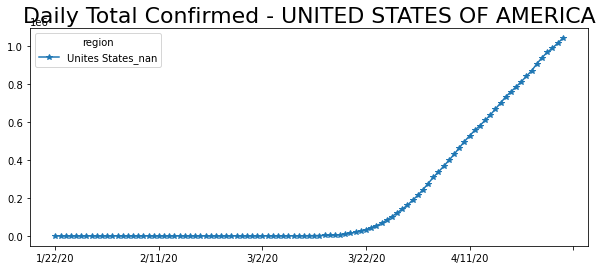

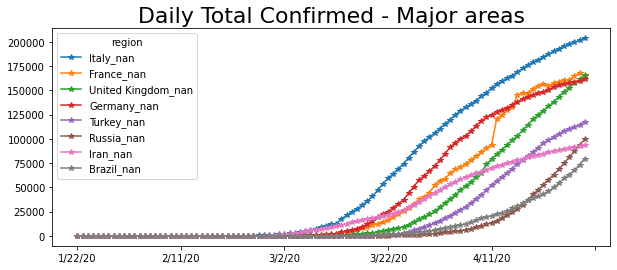

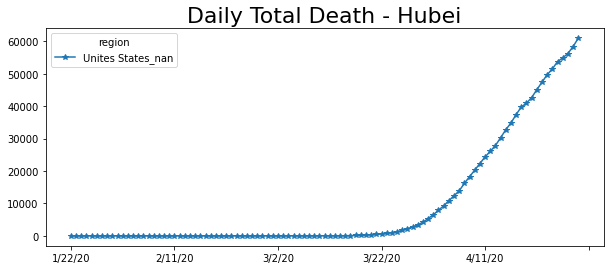

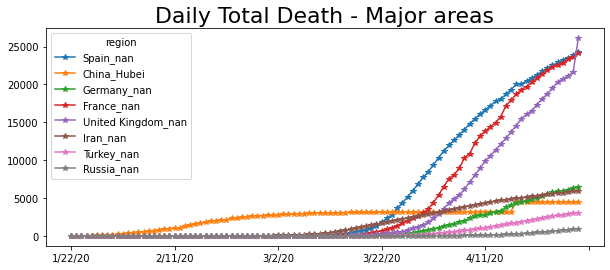

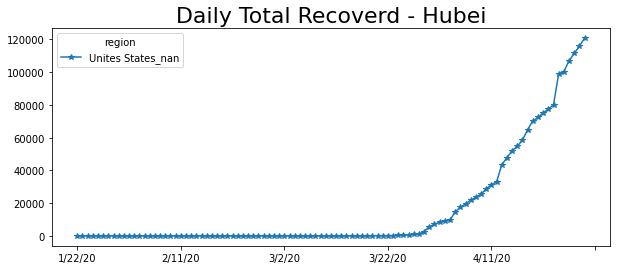

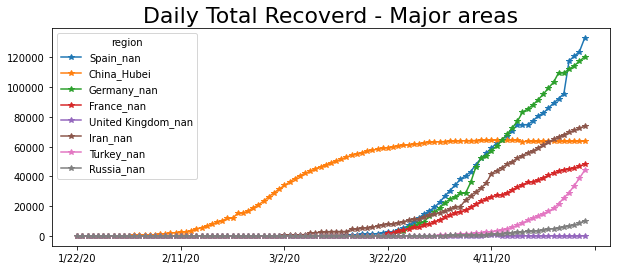

In [12]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - UNITED STATES OF AMERICA',fontdict={'fontsize': 22})
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Hubei',fontdict={'fontsize': 22})
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Hubei',fontdict={'fontsize': 22})
p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22})

* Now, saving the ts_r dataframe to our directory, by using the pd.to_csv() function.

In [0]:
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv(r'/content/gdrive/My Drive/covid19h/ts_r2.csv')

* The rpy2 package helps in using R in python kernels.

* You can find more information here: https://rpy2.github.io/doc/latest/html/introduction.html

In [14]:
#importing rpy2 package for using R.
import rpy2
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


* Installing pracma and reshape packages.

* You can find more information regarding pracma here: https://cran.r-project.org/package=pracma

* You can find more information regarding reshape here: https://cran.r-project.org/package=reshape

In [15]:
%%R
install.packages('pracma')
install.packages('reshape')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pracma_2.2.9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 400551 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [18]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/content/gdrive/My Drive/covid19h/ts_r2.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: Metrics

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [0]:
p=%R pred_all


# Merging the R ouput due to the package problem.

In [0]:

t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
 if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
p.set_index(temp.index,inplace=True)
#temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']


* For details regarding minimum and maximum temperatures, reference was taken from the dataset used in this kernel: https://www.kaggle.com/davidbnn92/weather-data/data

In [0]:
w=pd.read_csv('/content/gdrive/My Drive/covid19h/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('/content/gdrive/My Drive/covid19h/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [0]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

# Training our regression algorithm.

In [24]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=(t.iloc[i-1,2]/t.iloc[i-2,2]-1)*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=(t.iloc[i-1,2]/t.iloc[i-4,2]-1)*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=(t.iloc[i-1,2]/t.iloc[i-8,2]-1)*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
t['kalman_prediction']=round(t['kalman_prediction'])
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
train['infected_rate'] =train['last_day']/train['population']*10000
train=train.merge(w,how='left',on=['date','region'])
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':


         region           mse         rmse          mae
26  China_Hubei  5.079873e+07  7127.322967  1525.606061


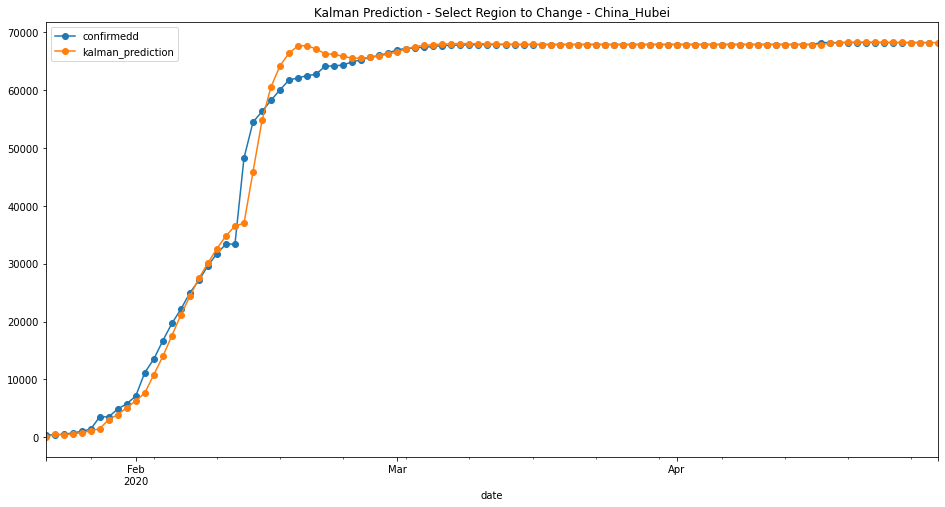

In [25]:
# Select region
region='China_Hubei'
place=0

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'confirmedd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])


       region           mse         rmse         mae
48  India_nan  1.214833e+07  3485.445168  466.161616


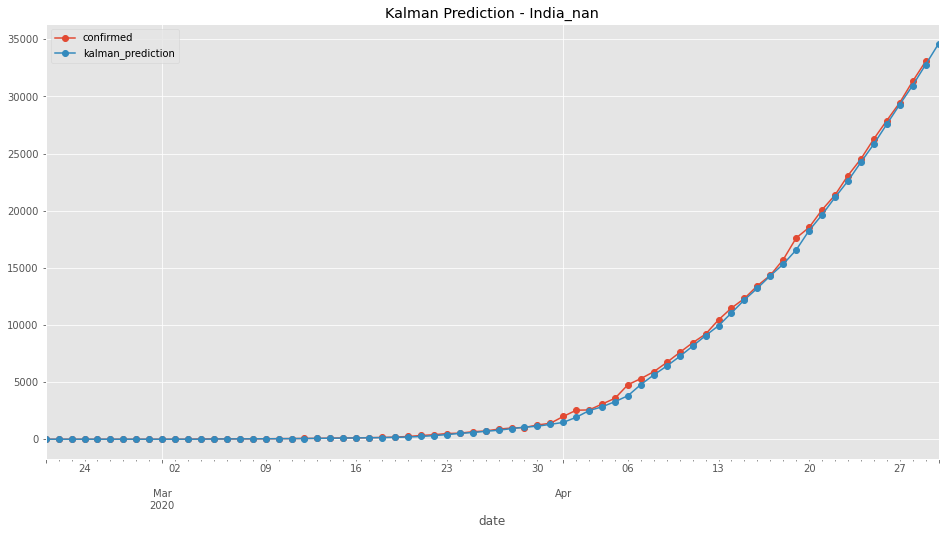

In [26]:
plt.style.use('ggplot')
# Select region
#region= 'Israel_nan'
#region='Brazil_nan'
#region='Unites States_nan'
region='India_nan'
#region='China_Hubei'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'confirmed'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[30:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])


* By doing the below mentioned steps, we are trying to find out the importance of each variables, used for the the prediction, using random forest classifier provied by h20 package.

* You can find further information regarding h20 here: http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/intro.html

* Find more information on linear regression here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Importing the necessary packages for finding out the variable importance

In [27]:
!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='8G')
import numpy as np
from sklearn.linear_model import LinearRegression

     |████████████████████████████████| 129.6MB 80kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.2-py2.py3-none-any.whl size=129672980 sha256=ac07efb0f55f86105095c62adde752edb696405dd06fbe9f9e51e1f2d4f37a2d
  Stored in directory: /root/.cache/pip/wheels/35/f0/d4/2090fb81ef10fd3dedffd1386a8a4d79b882e8e978fbee4e14
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxi1duftj
  JVM stdout: /tmp/tmpxi1duftj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxi1duftj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
C

H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_4k0knk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


# Setting the dates and giving more weight to the recent dates.

In [0]:
train=train.fillna(0) 
train_df=train[train['date']<'2020-02-17']
boots=train_df[train_df['date']>='2020-02-14'] #to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
train_df_hubei=train_df[train_df['region']=='China_Hubei']
test=train[train['date']>='2020-02-17']
test=test[test['date']<'2020-02-19']

* Taking into account, all the variables regarding the variable importance check.

In [0]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
             '1_day_change_rate', 
            '3_day_change_rate',
             '7_day_change_rate', 
            'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
          ]

* Here we are using the kalmin filtered inputs for our linear regression model, which are much accurate due to the usage of the immediate previous time step.

In [0]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values
#pred2.iloc[:55]

In [31]:
train_h20 = h2o.H2OFrame(train_df)
train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)
model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


Feature importance for the Hubei model using RF

In [32]:
model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF

,variable,relative_importance,scaled_importance,percentage
0,kalman_prediction,4.158503e+12,1.000000,0.300505
1,infected_rate,2.747002e+12,0.660575,0.198506
2,last_day,2.463358e+12,0.592367,0.178009
3,3_day_change,1.683576e+12,0.404851,0.121660
4,7_day_change,1.129563e+12,0.271627,0.081625
5,1_day_change,6.969664e+11,0.167600,0.050365
6,3_day_change_rate,4.360796e+11,0.104865,0.031512
7,7_day_change_rate,2.640682e+11,0.063501,0.019082
8,1_day_change_rate,1.084350e+11,0.026075,0.007836
9,min,8.880878e+10,0.021356,0.006418


* The correlation matrix, for showing the variable importance.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Correlation Matrix


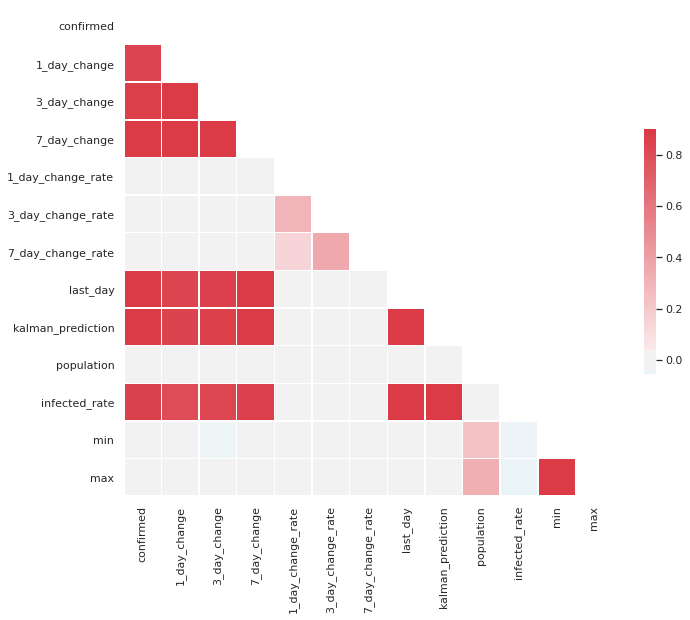

In [33]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [34]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.844749
3_day_change         0.874227
7_day_change         0.898513
1_day_change_rate   -0.021572
3_day_change_rate   -0.029276
7_day_change_rate   -0.024637
last_day             0.961060
kalman_prediction    0.962011
population           0.008592
infected_rate        0.857105
min                 -0.013054
max                 -0.001980
Name: confirmed, dtype: float64


* A graph showing the variation of minimum and maximum temperatures in the india Region for example purpose.

Text(0.5, 1.0, 'Daily Min/Max Temperature - India')

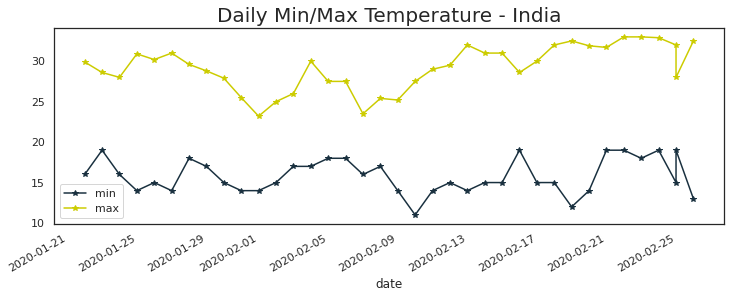

In [35]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
p=p[p['region']=='India_nan']
p.iloc[:37,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - India',fontdict={'fontsize': 20})


* A table showing more infected areas vs temperature.

In [0]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)

## **X Day ahead prediction using kalman filter**

* Using the R interface again.


In [38]:

%%R
install.packages('reshape')

(as ‘lib’ is unspecified)







	‘/tmp/RtmpXHXN5d/downloaded_packages’



* Find more information regarding readr here: https://cran.r-project.org/package=readr

* Find more information regarding metrics here: https://cran.r-project.org/web/packages/Metrics/Metrics.pdf

In [40]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/content/gdrive/My Drive/covid19h/ts_r2.csv")
all$X1<-NULL
for (i in 1:30) { # Set i days prediction
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}


cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [0]:
all_new=%R all_new

* Converting the date column values dtype to datetime format.

* Find out more information here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [0]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Region to Change - India_nan')

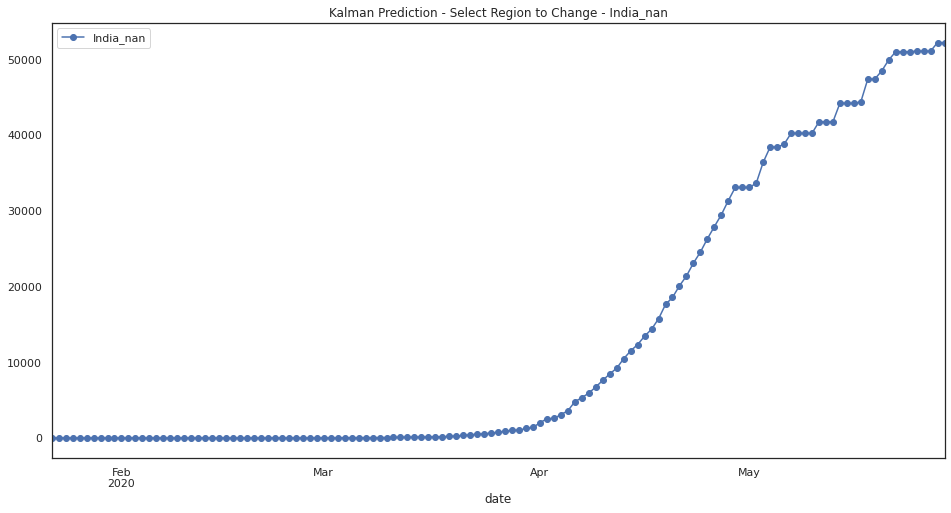

In [43]:
# Select region
region=['date','China_Anhui', 'China_Beijing',
       'China_Chongqing', 'China_Fujian', 'China_Gansu',
       'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
       'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan','China_Hunan', 
       'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
       'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
       'China_Shandong', 'China_Shanghai', 'China_Shanxi',
       'China_Sichuan',  'China_Xinjiang',
       'China_Yunnan', 'China_Zhejiang', 
        'Hong Kong_Hong Kong','Japan_nan','Others_Diamond Princess cruise ship']
#p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
#p_kalman=p_kalman.set_index(['date'])
#p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')

p_kalman2=all_new[['date','India_nan']]
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p_kalman2.columns[0]))


In [45]:
all_new

,date,Afghanistan_nan,Algeria_nan,Argentina_nan,Armenia_nan,Australia_New South Wales,Australia_Queensland,Australia_Victoria,Austria_nan,Azerbaijan_nan,Bahrain_nan,Bangladesh_nan,Belarus_nan,Belgium_nan,Bolivia_nan,Bosnia and Herzegovina_nan,Brazil_nan,Bulgaria_nan,Cameroon_nan,Canada_Alberta,Canada_British Columbia,Canada_Ontario,Canada_Quebec,Chile_nan,China_Guangdong,China_Henan,China_Hong Kong,China_Hubei,China_Hunan,China_Zhejiang,Colombia_nan,Cote d'Ivoire_nan,Croatia_nan,Cuba_nan,Czechia_nan,Denmark_nan,Djibouti_nan,Dominican Republic_nan,Ecuador_nan,Egypt_nan,...,Kazakhstan_nan,"Korea, South_nan",Kuwait_nan,Lithuania_nan,Luxembourg_nan,Malaysia_nan,Mexico_nan,Moldova_nan,Morocco_nan,Netherlands_nan,New Zealand_nan,Nigeria_nan,North Macedonia_nan,Norway_nan,Oman_nan,Pakistan_nan,Panama_nan,Peru_nan,Philippines_nan,Poland_nan,Portugal_nan,Qatar_nan,Romania_nan,Russia_nan,Saudi Arabia_nan,Serbia_nan,Singapore_nan,Slovakia_nan,Slovenia_nan,South Africa_nan,Spain_nan,Sweden_nan,Switzerland_nan,Thailand_nan,Turkey_nan,Ukraine_nan,United Arab Emirates_nan,United Kingdom_nan,Unites States_nan,Uzbekistan_nan
1,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,5.0,0.0,444.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,5.0,2.0,444.0,9.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,9.0,2.0,549.0,24.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0
4,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,32.0,5.0,761.0,43.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2.0,0.0
5,2020-01-26,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,111.0,83.0,8.0,1058.0,69.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2020-05-25,3699.0,5894.0,7491.0,2468.0,3524.0,1763.0,1838.0,16891.0,3026.0,5696.0,14271.0,22387.0,62555.0,1725.0,2477.0,116661.0,2283.0,3154.0,8777.0,3708.0,25172.0,32396.0,27030.0,2173.0,1629.0,1645.0,97833.0,1194.0,1443.0,10485.0,1948.0,2998.0,2657.0,11750.0,14274.0,1457.0,9125.0,49134.0,8630.0,...,4450.0,18478.0,7492.0,1827.0,5022.0,7222.0,34684.0,6987.0,8029.0,51458.0,1915.0,2859.0,1984.0,10262.0,5860.0,27669.0,12838.0,57335.0,11494.0,15237.0,34209.0,33288.0,15992.0,150365.0,36138.0,9782.0,38953.0,2145.0,2149.0,11905.0,272891.0,34324.0,32870.0,3825.0,167567.0,14872.0,23453.0,252446.0,1383346.0,2820.0
126,2020-05-26,3699.0,6071.0,7491.0,2504.0,3694.0,1883.0,1929.0,17361.0,3222.0,5877.0,14271.0,23208.0,62555.0,1820.0,2477.0,116661.0,2283.0,3154.0,8806.0,3708.0,25172.0,33475.0,27432.0,2173.0,1636.0,1659.0,97833.0,1217.0,1443.0,10485.0,1

All the countries having the predictions

# **Iterative Regression**

* Fitting the regression model to our data.

In [46]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
  if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
    t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
  if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
    t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
    t_iter.iloc[i,6]=(t_iter.iloc[i-1,2]/t_iter.iloc[i-2,2]-1)*100
    t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
  if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
    t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
    t_iter.iloc[i,7]=(t_iter.iloc[i-1,2]/t_iter.iloc[i-4,2]-1)*100
  if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
    t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
    t_iter.iloc[i,8]=(t_iter.iloc[i-1,2]/t_iter.iloc[i-8,2]-1)*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])
test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])
test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
  if(np.isnan(test_iter.iloc[i,13])):
    if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
      test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
      test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


* Filling the missing values with 0 values.

In [0]:
test_iter=test_iter.fillna(0) 

In [0]:
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values
for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
      if(pred.iloc[i,0]<pred.iloc[i-1,1]):
        pred.iloc[i,0]=pred.iloc[i-1,1]
pred = pred.pivot_table(index='date',columns='region',values='prediction') # pivot pred df

* Displaying the information about the datatypes present in different columns of the pred-DataFrame.

In [49]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 2020-01-22 to 2020-05-30
Data columns (total 96 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Afghanistan_nan             130 non-null    float64
 1   Algeria_nan                 130 non-null    float64
 2   Argentina_nan               130 non-null    float64
 3   Armenia_nan                 130 non-null    float64
 4   Australia_New South Wales   130 non-null    float64
 5   Australia_Queensland        130 non-null    float64
 6   Australia_Victoria          130 non-null    float64
 7   Austria_nan                 130 non-null    float64
 8   Azerbaijan_nan              130 non-null    float64
 9   Bahrain_nan                 130 non-null    float64
 10  Bangladesh_nan              130 non-null    float64
 11  Belarus_nan                 130 non-null    float64
 12  Belgium_nan                 130 non-null    float64
 13  Bolivia_nan     

* Now saving the above obtained predictions for using them in the npi prediction step.

In [0]:
d = pred
d = d.T
d.to_csv(r'/content/gdrive/My Drive/covid19h/pred.csv')


# Now, we go into step 2 wherin we are going to try and predict the best applicable npis for a particular situation.

* Again as a prelimnary step, we will be importing all the necessary packages, libraries and algorithms.

* For more details regarding the algorithms and their usage on your own dataset, please find it here: https://scikit-learn.org/

In [0]:
# Importing the libraries
import numpy as np
import pandas as pd
import datetime 
import calendar 
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.preprocessing import StandardScaler

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import ExtraTreeClassifier

# Importing our cleaned and modified dataset.

* Sources:

* https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset 

* https://www.kaggle.com/davidoj/covid19-national-responses-dataset

* https://www.kaggle.com/fernandol/countries-of-the-world

Also the prediction-values which I have saved in the last phase of step 1.

Some details regarding the columns of mastersheet prediction are:

* Each row is an entry/instance of a particular Npi getting implemented.

* Country: This column represents the country to which the entry belongs to.

* Net migration: The net migration rate is the difference between the number of immigrants (people coming into an area) and the number of emigrants (people leaving an area) throughout the year.

* Population density: Population density is the number of individuals per unit geographic area, for example, number per square meter, per hectare, or per square kilometer.

* Sex Ratio: The sex ratio is the ratio of males to females in a population.

* Population age-distribution: Age distribution, also called Age Composition, in population studies, the proportionate numbers of persons in successive age categories in a given population. (0-14yrs/60+yrs %)

* Health physicians per 1000 population: Number of medical doctors (physicians), including generalist and specialist medical practitioners, per 1 000 population.

* Mobile cellular subscription per 100 inhabitants: Mobile cellular telephone subscriptions are subscriptions to a public mobile telephone service that provide access to the PSTN using cellular technology.

* Active on day: The number of active cases of covid19 infections in that particular country on the day it was implemented.

* Sevenday, twelveday and thirty day predictions are for active cases from the date it was implemented.

* And the date-implemented is converted to whether it was a week-day or a week-end to make it usable for training.

* The last column represents the category to which the npi that implemented belonged to.

Category 1: Public -health measures and social-distancing.

Category 2: Social-economic measures and movement-restrictions.

Category 3: Partial/complete lockdown.


* To categorise the npis we followed a 5 step analysis:

* Step 1: We choosed 6 different countries that have implemented atleast one of the above-mentioned npis.

* Step 2: We had chosen a particular date wherein one of the npi was implemented.

* Step 3: From that date (chosen) we had calculated 5day, 8day, 12day growth rate in the number of confirmed cases in that country.

* Step 4: According to: 1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4327893/
    2) https://www.worldometers.info/coronavirus/coronavirus-incubation-period/
    we took a reference that, over 50% of the people who are affected on day1 show symptoms by day5, over 30% of the people affected on           day1 show symptoms by day8 and the last 20% start showing symptoms by day12. Assuming that, they get a checkup as soon as they are             showing symptoms, we had calculated a cumilative growth rate.
* Step 5: This cumilative growth rate was not very accurate due to the population densities of the countries being different. So, we had normalised the obtained scores from step4 by the population densities. That gave us the following results.

* More information can be found here: https://archive.is/JNx03 and https://archive.is/UA3g14

* [ (896.4961042933885, 'CHINA', 'SOCIAL DISTANCING'),
*  (720.7571447424511, 'FRANCE', 'PUBLIC HEALTH MEASURES'),
*  (578.0345389562175, 'SPAIN', 'SOCIAL AND ECONOMIC MEASURES'),
*  (527.7087251438776, 'IRAN', 'MOV RESTRICTION'),
*  (484.1021819976962, 'ITALY', 'PARTIAL LOCKDOWN'),
*  (207.67676767676767, 'INDIA', 'COMPLETE LOCKDOWN')]

Ex: (Cumilative growthrate(normalised), Country Name, Measure-taken)

* So the above analysis shows the decreasing order of growth rates, however this is not very accurate due to various other reasons, but this gives a rough estimate of the effectiveness/strength of the npis.

* With this categorisation in mind, let's go the next step.

So, the dataset that we used is: https://www.kaggle.com/davidoj/covid19-national-responses-dataset

In [0]:
dataset = pd.read_csv("/content/gdrive/My Drive/covid19h/mastersheetprediction.csv")

* Noting down the information of the dataset for a quick look,

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              891 non-null    object 
 1   Net migration                                        891 non-null    float64
 2   Population density (per km2, 2017)                   891 non-null    float64
 3   Sex ratio (m per 100 f, 2017)                        891 non-null    float64
 4   Population age distribution (0-14   60+ years, %)    891 non-null    float64
 5   Health: Physicians (per 1000 pop.)                   891 non-null    float64
 6   Mobile-cellular subscriptions (per 100 inhabitants)  891 non-null    float64
 7   activeondateimp                                      891 non-null    int64  
 8   Sevendaypred                                         891 non-null    f

# There are 54 countries in the dataset, which have more than 1000cases at the time of creating this notebook.

In [54]:
dataset.Country.unique()

array(['Algeria', 'Argentina', 'Austria', 'Belgium', 'Brazil', 'Chile',
       'China', 'Colombia', 'Croatia', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg',
       'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand',
       'Norway', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Qatar', 'Romania', 'Saudi Arabia', 'Serbia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States of America'], dtype=object)

# Now extracting the input-features and the target by df.iloc function.
* For more information regarding the df.iloc, please use this link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [0]:
X = dataset.iloc[:, 0:13].values# input feature
y = dataset.iloc[:, 13].values# label/target

* Checking the shape by using the numpy.ndarray.shape function.

* Find more information here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html

In [56]:
X.shape, y.shape

((891, 13), (891,))

* The next step is encoding the categorical data, this was done using labelencoder and one-hot encoder.

* You can find more information regarding the sklearn-preprocessing library here: http://scikit-learn.org/stable/modules/preprocessing.html

* Instead of one-hot encoder, we used using ColumnTransformer here: http://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [0]:
#encoding the X
ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 0:]

# Now we split the dataset into train and test set.

* We will used train_test_split for this part, find more information here: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

# We would be feature scaling the inputs.

* We used standard StandardScaler function from sklearn's preprocessing library.

* Find more information here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.toarray())
X_test = sc.transform(X_test.toarray())

# Checking the frequencies of our categories in the target array-(y)

* We use the np.unique() function, find more information here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html

In [61]:
np.unique(y, return_counts=True)

(array([1, 2, 3]), array([459, 395,  37]))

# Class-imbalance problem.

* We notice that there is a class-imbalance problem. The caegory 3 is a minority class which is only 2% of the dataset.

* To tackle this problem we have used smote technique(over-sampling technique as we have less number of examples), find more information here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html


In [62]:
!pip install smote-variants

     |████████████████████████████████| 133kB 4.9MB/s 
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7453 sha256=8d4a9dca47fd912c941720916f5a972a3d41a2135e3564a01930adc746848718
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
  Created wheel for minisom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=3c2ef1e25645fe120604576a9fe170e48a71bbf874acc8a5363086d4e754c097
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built statistics minisom


In [63]:
import smote_variants as sv

oversampler= sv.MulticlassOversampling(sv.distance_SMOTE())
# X_samp and y_samp contain the oversampled train-dataset
X_samp, y_samp= oversampler.sample(X_train, y_train)
#oversampling the test dataset
X_samptest, y_samptest= oversampler.sample(X_test, y_test.ravel())

2020-04-30 09:15:28,552:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
INFO:smote_variants:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-04-30 09:15:28,562:INFO:MulticlassOversampling: Sampling minority class with label: 2
INFO:smote_variants:MulticlassOversampling: Sampling minority class with label: 2
2020-04-30 09:15:28,569:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
INFO:smote_variants:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-04-30 09:15:28,601:INFO:MulticlassOversampling: Sampling minority class with label: 3
INFO:smote_variants:MulticlassOversampling: Sampling minority class with label: 3
2020-04-30 09:15:28,605:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'prop

In [64]:
y_samp.shape, y_samptest.shape

((1170,), (207,))

# The problem of multilabel classification.

* Multi-label classification is a generalization of multiclass classification, which is the single-label problem of categorizing instances into precisely one of more than two classes.

* Our dataset suffers from multilabel classification problem, this is due to that many countries have implemented npis that belong to more than one category in a single day, this makes an entry which have all the input variables same but the target-category is different. 

* This makes it a difficult problem with the existing features.

* Drawback: We did not have any strong differentiating feature in our dataset.

# To tackle this problem of multilabel classfication problem to an extent we used various multilearn models from sklearn.

# To use the multioutputclassifier, we encoded the category column.

In [66]:
yovs = pd.read_csv("/content/gdrive/My Drive/covid19h/oversampletargets.csv")
yovs = yovs.iloc[:,1:]
yovs

,C1,C2,C3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1165,0,0,1
1166,0,0,1
1167,0,0,1
1168,0,0,1


* We use the multi-ouput classifier using the randomforest as the base-algorithm.

* Find more information here: http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html

In [67]:
#multi-output classifier and the random-forest classifier.
from sklearn.multioutput import MultiOutputClassifier
random_forest = RandomForestClassifier(n_estimators=1000, criterion = 'entropy')#with single column targets
random_forest.fit(X_samp, y_samp)

Y_pred = random_forest.predict(X_samp)

multi_target_forest = MultiOutputClassifier(random_forest, n_jobs=-1)
Ypred = multi_target_forest.fit(X_samp, yovs).predict(X_samp)
multi_target_forest.score(X_samp, yovs)
acc_multi = round(multi_target_forest.score(X_samp, yovs) * 100, 2)
print(acc_multi,"trainset-multi-output")

random_forest.score(X_samp, y_samp)
acc_random_forest = round(random_forest.score(X_samp, y_samp) * 100, 2)
print(acc_random_forest,"trainset-Randomforest")

85.81 trainset-multi-output
88.12 trainset-Randomforest


* Hamming loss for the predictions on train set by randomforest classifier.

In [68]:
from sklearn.metrics import hamming_loss
print("Hamming loss = ",hamming_loss(y_samp,Y_pred))

Hamming loss =  0.1188034188034188


# We used the pipeline technique from sklearn.

* Find more information here: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

* We used the NeighborhoodComponentsAnalysis and  KNeighborsClassifier with pipeline.

In [69]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis(random_state=10)
knn = KNeighborsClassifier(n_neighbors=1)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_samp, y_samp)

print(nca_pipe.score(X_samp, y_samp)*100, "%")

85.8974358974359 %


# Finding the oob score using RF classifier.

* Find more information here: https://en.wikipedia.org/wiki/Out-of-bag_error

* We are finding the oob-score for our train set.

In [70]:
random_forest = RandomForestClassifier(n_estimators=100, criterion = 'entropy', oob_score = True)
random_forest.fit(X_samp, y_samp)
Y_prediction = random_forest.predict(X_samp)

random_forest.score(X_samp, y_samp)

acc_random_forest2 = round(random_forest.score(X_samp, y_samp) * 100, 2)
print(round(acc_random_forest2,2,), "%")

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

88.12 %
oob score: 69.39999999999999 %


# We used Cross validation also and calculated mean accuracies.

* For more information, refer this: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [71]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100, criterion = 'entropy')
scores = cross_val_score(rf, X_samp, y_samp, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.44444444 0.69230769 0.72649573 0.73504274 0.69230769 0.67521368
 0.66666667 0.70940171 0.76068376 0.84615385]
Mean: 0.6948717948717948
Standard Deviation: 0.09692850344326052


# KNeighborsClassifier

* Find more information here: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [72]:
knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(X_samp, y_samp)  
Y_pred = knn.predict(X_samp)  
acc_knn = round(knn.score(X_samp, y_samp) * 100, 2)
print(acc_knn,"trainset")

84.79 trainset


In [73]:
from sklearn.metrics import hamming_loss
print("Hamming loss-trainset = ",hamming_loss(y_samp,Y_pred))

Hamming loss-trainset =  0.15213675213675212


# Decision tree-classifier
* For more information: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [74]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_samp, y_samp)  
Y_pred = decision_tree.predict(X_samp)  
acc_decision_tree = round(decision_tree.score(X_samp, y_samp) * 100, 2)
print(acc_decision_tree,"trainset")

88.12 trainset


In [75]:
from sklearn.metrics import hamming_loss
print("Hamming loss-trainset = ",hamming_loss(y_samp,Y_pred))

Hamming loss-trainset =  0.1188034188034188


# Hyperparameter tuning using GridsearchCV

* We tuned the hyperparameters of the random-forest classifier using gridsearchcv.

* Find more information here: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [0]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_samp, y_samp)
clf.best_params_

* I'm not executing the above cell, because it will take a huge time to get completed, rather the output is displayed below.

{'criterion': 'gini',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

* Retraining the Rf with the above mentioned hyperparameters.

In [76]:
random_forest = RandomForestClassifier(criterion = "gini",    #the best parameters for the rf classifier
                                       min_samples_leaf = 10, 
                                       min_samples_split = 2,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_samp, y_samp)
Y_prediction = random_forest.predict(X_samptest)

random_forest.score(X_samp, y_samp)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 71.03 %


In [79]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 3.6MB/s 


# Implementing classifier chain technique as it tackles multilabel classification problems.

* For more information: http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.ClassifierChain.html

In [0]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.ensemble import RandomForestClassifier

# initialize LabelPowerset multi-label classifier with a RandomForest
classifier = ClassifierChain(
    classifier = RandomForestClassifier(n_estimators=200),
    require_dense = [False, True]
)

# train
classifier.fit(X_samp, y_samp)

# predict
predictions = classifier.predict(X_samp)
pred2 = classifier.predict(X_samptest)

In [82]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy-train:",metrics.accuracy_score(y_samp.reshape(-1,1), predictions.todense())*100, "%")
print("Accuracy-test:",metrics.accuracy_score(y_samptest.reshape(-1,1), pred2.todense())*100, "%")

Accuracy-train: 88.11965811965811 %
Accuracy-test: 64.25120772946859 %


# Using the onevsrest classifier.

* For more details: http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

In [0]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
pred = OneVsRestClassifier(RandomForestClassifier(n_estimators=200, class_weight='balanced')).fit(X_samp, y_samp).predict(X_samp)
pred2 = OneVsRestClassifier(RandomForestClassifier(n_estimators=200, class_weight='balanced')).fit(X_samp, y_samp).predict(X_samptest)

In [84]:
print("Accuracy-train:",metrics.accuracy_score(y_samp, pred)*100, "%")
print("Accuracy-test:",metrics.accuracy_score(y_samptest, pred2)*100, "%")

Accuracy-train: 88.11965811965811 %
Accuracy-test: 65.70048309178745 %


* This is by far the best accuracy we have got on the train and test set.

# Next, RadiusNeighborsClassifier with radius =1.

* It is considered to be a lazy algorithm.

* This gives the best accuracy as this fits the best to our dataset. This is because the training-examples we used for classification are very closed to each other in the feature space.

* For more information: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html

In [0]:
from sklearn.neighbors import RadiusNeighborsClassifier
neigh = RadiusNeighborsClassifier(radius=1, weights='distance',algorithm='brute')
neigh.fit(X_samp, y_samp)
ypredu = neigh.predict(X_samp)

In [86]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy-train:",metrics.accuracy_score(y_samp, ypredu)*100, "%")

Accuracy-train: 91.7948717948718 %


In [87]:
from sklearn.metrics import hamming_loss
print("Hamming loss = ",hamming_loss(y_samp,ypredu))

Hamming loss =  0.08205128205128205


Find more about the jaccard_score: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html

In [88]:
from sklearn.metrics import jaccard_score
js= jaccard_score(y_samp, ypredu, average=None)
js

array([0.80952381, 0.78019324, 0.96666667])

Find more about the classification report: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [89]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_samp, ypredu, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.84      0.96      0.89       390
     class 2       0.93      0.83      0.88       390
     class 3       1.00      0.97      0.98       390

    accuracy                           0.92      1170
   macro avg       0.92      0.92      0.92      1170
weighted avg       0.92      0.92      0.92      1170



* We plot the confusion matrix to see what's actually happening.

* Find more information here: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [0]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

In [0]:
from sklearn.metrics import confusion_matrix
target_names = ['class 1', 'class 2', 'class 3']
cm = confusion_matrix(y_samp, ypredu)

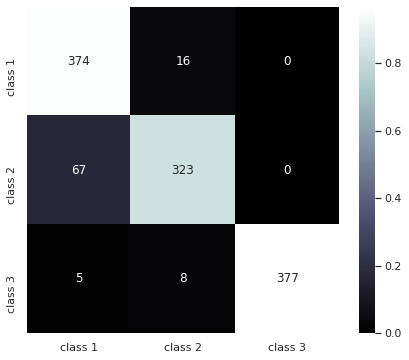

In [92]:
plot_confusion_matrix(cm, classes=target_names)

# The drawbacks of our approach.

* This above-mentioned approach has many drawbacks, one of them is an incomplete dataset.

* There are no good-differentiating features in the dataset.

* In our approach we are not able to decide the effectiveness and a go-to plan of action for deploying npis.

* All the data-points are very-similar to one-another, hence it is being difficult for the algorithm to learn.

# Further work:

* There could be a set of strong differentiating features in the dataset, which will make the generalization easy.

* There can be further categorisation of npis for better implementation of them.

* The dataset can also be combined with economic parameters further, to understand the economic feasibilty of the npi-implementation.

* It can further be used to predict the decrease in growth rates, once an npi is implemented to further note the real-time effectiveness of the npis in a particular demographic

Note: This work is inspired from many data science resources. Any traces of replications, which may appear, is purely co-incidental.